Albocycline
===========

<!--<img title="https://pubchem.ncbi.nlm.nih.gov" src="https://pubchem.ncbi.nlm.nih.gov/image/imagefly.cgi?cid=6440973&width=500&height=500" align="center" height="400" width="400">-->


<hr style="height:2.5px">

<h2 style="align: center;font-size: 12pt;">Summary:</h2> Albocycline is a macrolactone isolated from Streptomyces maizeus.  This macrolactone has recently been identified as a promising lead antibiotic candidate for the treatment of both vancomycin-resistant S. aureus (VRSA) and MRSA.<br>
In our previous example we showed in detail how to calculate the consistency of theoretical modeling with experiment. The user gained insight on how to run `biceps` calculations in full. In this example, we will repeat the process parallelizing lambda values with `multiprocessing`.</h2>



**To convert this Jupyter Notebook into a script use the following command:**

```
$ jupyter nbconvert --to python albocycline.ipynb
```

<hr style="height:2.5px">

In [8]:
import numpy as np
import pandas as pd
import biceps
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
####### Data and Output Directories #######
print(f"Possible input data extensions: {biceps.toolbox.list_possible_extensions()}")
energies = np.loadtxt('albocycline/albocycline_QMenergies.dat')*627.509  # convert from hartrees to kcal/mol
energies = energies/0.5959   # convert to reduced free energies F = f/kT
energies -= energies.min()  # set ground state to zero, just in case
dataFiles = 'albocycline/J_NOE'
input_data = biceps.toolbox.sort_data(dataFiles)
print(f"Input data: {biceps.toolbox.list_extensions(input_data)}")
outdir = 'results'
biceps.toolbox.mkdir(outdir)

Possible input data extensions: ['H', 'Ca', 'N', 'J', 'noe', 'pf']
Input data: ['J', 'noe']


In [4]:
####### Parameters #######

nsteps = 100000      # for testing
#nsteps=10000000     # for production

print(f"nSteps of sampling: {nsteps}")
n_lambdas = 3
lambda_values = np.linspace(0.0, 1.0, n_lambdas)
parameters = [
        {"ref": 'uniform', "sigma": (0.05, 20.0, 1.02)},
        {"ref": 'exponential', "sigma": (0.05, 5.0, 1.02), "gamma": (0.2, 5.0, 1.01)}
        ]
pd.DataFrame(parameters)

nSteps of sampling: 100000


,ref,sigma,gamma
0,uniform,"(0.05, 20.0, 1.02)",NaN
1,exponential,"(0.05, 5.0, 1.02)","(0.2, 5.0, 1.01)"


In [5]:
####### Multiprocessing Lambda values #######
@biceps.multiprocess(iterable=lambda_values)
def mp_lambdas(lam):
    ensemble = biceps.Ensemble(lam, energies)
    ensemble.initialize_restraints(input_data, parameters)
    sampler = biceps.PosteriorSampler(ensemble)
    sampler.sample(nsteps=nsteps, verbose=False)
    sampler.traj.process_results(f"{outdir}/traj_lambda{lam}.npz")

Number of CPUs: 10
Number of processes: 3


100%|███████████████████████████████████████████████████████████| 100000/100000 [00:01<00:00, 62547.07it/s]



Accepted 70.378 % 


100%|███████████████████████████████████████████████████████████| 100000/100000 [00:01<00:00, 62460.76it/s]


Accepted [ ...Nuisance paramters..., state] %
Accepted 67.006 % 



100%|███████████████████████████████████████████████████████████| 100000/100000 [00:01<00:00, 62394.44it/s]


Accepted [32.549 31.386 31.386  6.443] % 



Accepted [ ...Nuisance paramters..., state] %

Accepted 71.999 % 


Accepted [32.549 31.725 31.725  2.732] % 

Accepted [ ...Nuisance paramters..., state] %

Accepted [32.643 31.537 31.537  7.819] % 



not all state sampled, these states [86] are not sampled
not all state sampled, these states [ 9 15 48] are not sampled
not all state sampled, these states [ 4  5  7  9 11 15 16 18 21 24 25 27 28 34 40 42 44 48 51 54 58 62 76 77
 81 82 86 87 94 95 98] are not sampled


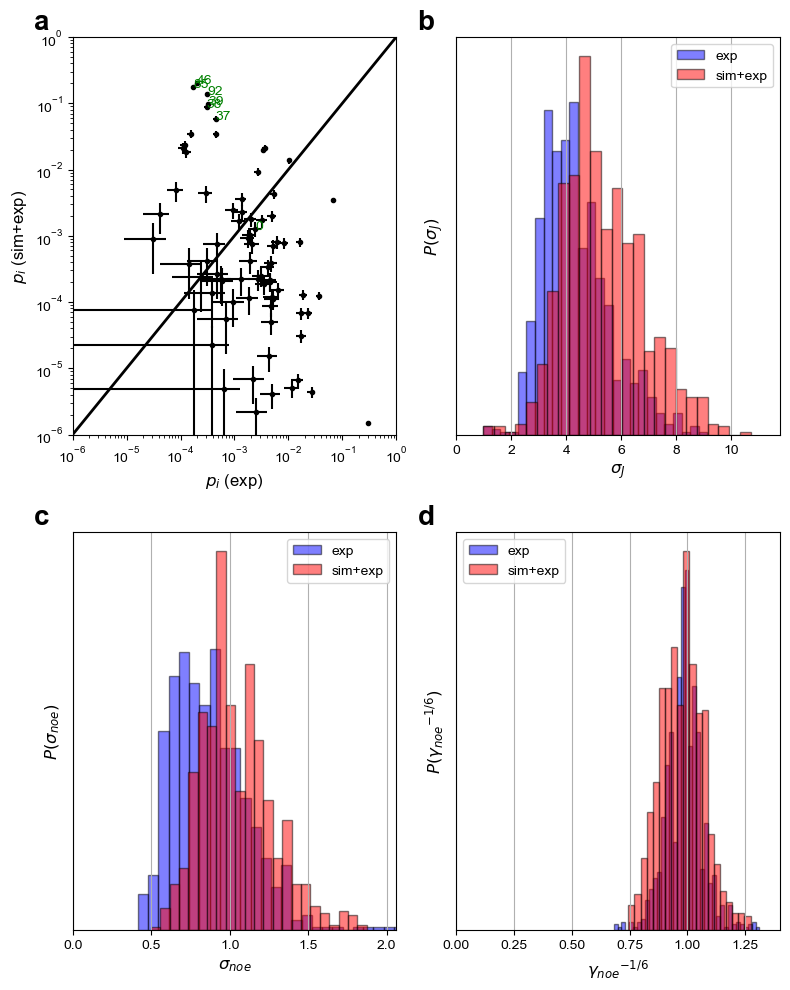

In [9]:
####### Posterior Analysis #######
A = biceps.Analysis(outdir, nstates=len(energies))

try:
    %matplotlib inline
    A.plot()
except:
    print(ipython_warning)

<h6 style="align: justify;font-size: 12pt"># <span style="color:red;">NOTE</span>: The following cell is for pretty notebook rendering</h6>

In [10]:
from IPython.core.display import HTML

def css_styling():
    styles = open("../../../theme.css", "r").read()
    return HTML(styles)

css_styling()